In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [19]:
filein = os.path.join("..", "..", "Data", "neutrons", "LGND_200_example_Danila_part1.csv")
df = pd.read_csv(filein, index_col=False)

In [20]:
df.head()

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,volumeID,parentnucleusPID
0,2112,0,0.000000,1.000000,0.000000,235.252843,14.883759,-140.971190,43.360474,0.000000,0.000000,0,1,primaryParticle,0,666
1,1000180400,1,0.000000,0.046642,460.312817,-435.764311,-184.044141,556.103132,46.412363,34.865949,-10.091845,0,16,hadElastic,0,666
2,1000180400,1,0.046642,0.000000,460.312918,-435.764273,-184.044112,556.103124,0.000000,0.000000,-0.000000,0,16,ionIoni,0,666
3,1000180400,1,0.000000,0.054088,398.022326,-708.969933,-809.467414,642.009579,-20.728782,-48.375690,35.438960,0,15,hadElastic,0,666
4,1000180400,1,0.054088,0.000000,398.022447,-708.969953,-809.467461,642.009613,-0.000000,-0.000000,0.000000,0,15,ionIoni,0,666


In [22]:
df.volumeID


0         0
1         0
2         0
3         0
4         0
         ..
316958    0
316959    0
316960    0
316961    0
316962    0
Name: volumeID, Length: 316963, dtype: int64

In [10]:
events_ar41 = df[(df.PID==1000180410) & (df.creatorprocess=='nCapture')].eventnumber.unique()
print("[Info] There are {} events of Ar41 de-excitation".format(len(events_ar41)))

[Info] There are 86 events of Ar41 de-excitation


In [12]:
gammas = df[(df.PID==22) & (df.eventnumber.isin(events_ar41))]
gammas

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,physvolname,parentnucleusPID
259,22,32,0.000000,1.293587,1.212604e+13,1018.919436,83.395601,-869.068718,-0.138833,0.921464,-0.897216,5,36,RadioactiveDecay,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
260,22,32,0.000029,0.443924,1.212604e+13,1009.409676,146.514007,-930.526204,-0.393158,0.183527,0.093877,5,36,compt,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
261,22,32,0.000313,0.276444,1.212604e+13,828.117353,231.141476,-887.237918,-0.053467,0.144713,-0.229392,5,36,compt,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
262,22,32,0.000249,0.234845,1.212604e+13,808.606228,283.950344,-970.948144,-0.215996,0.065815,-0.064545,5,36,compt,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
263,22,32,0.000015,0.124888,1.212604e+13,732.878759,307.024757,-993.577355,0.122288,-0.025244,0.002276,5,36,compt,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313131,22,2,0.000249,0.241483,6.134322e+02,-472.154792,1015.410640,-1014.581272,-0.132614,-0.017548,0.201046,4939,27,compt,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
313132,22,2,0.000313,0.209814,6.134936e+02,-482.275835,1014.071379,-999.237479,0.008499,-0.122362,0.170227,4939,27,compt,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
313133,22,2,0.000313,0.000000,6.135880e+02,-481.129709,997.570656,-976.282078,0.000000,-0.000000,0.000000,4939,27,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
313197,22,54,0.000000,0.003246,6.134372e+02,-471.213120,1015.474465,-1014.800283,-0.000312,-0.001759,-0.002710,4939,56,eBrem,DetectorArray_001_StringAssembly_001_DetUnit_0...,666


In [13]:
first_gammas = gammas.sort_values("time").groupby(["eventnumber", "tracknumber"]).first()

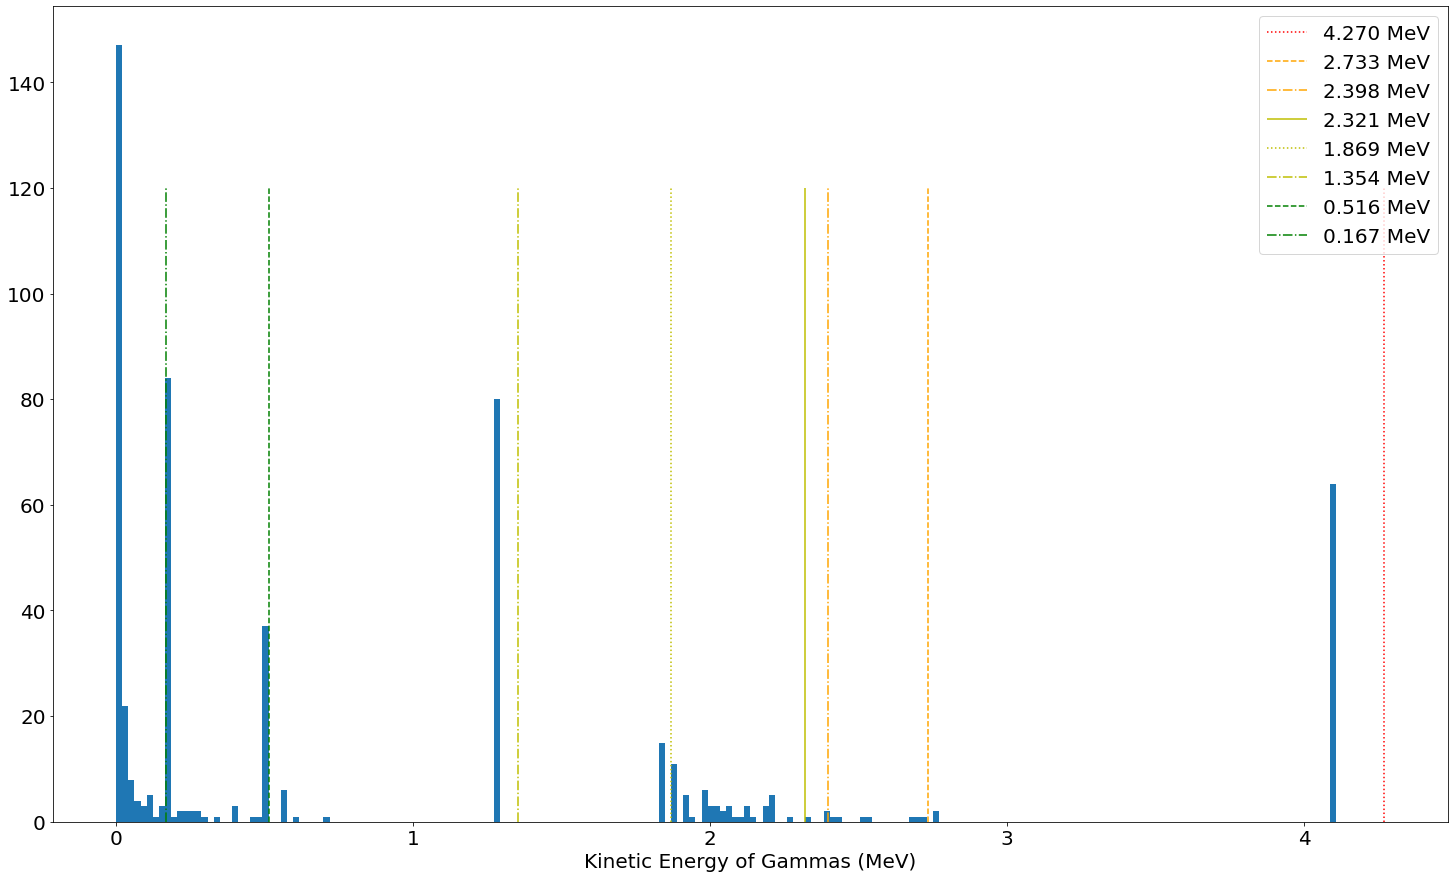

In [14]:
plt.hist(first_gammas.kineticenergy, bins=200, alpha=1)
ymax = 120
#plt.vlines(x=6.099, ymin=0, ymax=ymax, color='r', linestyles='solid', label="6.099 MeV")
plt.vlines(x=4.270, ymin=0, ymax=ymax, color='r', linestyles='dotted', label="4.270 MeV")
#plt.vlines(x=3.968, ymin=0, ymax=ymax, color='r', linestyles='dashed', label="3.968 MeV")
#plt.vlines(x=3.327, ymin=0, ymax=ymax, color='r', linestyles='dashdot', label="3.327 MeV")
#plt.vlines(x=3.010, ymin=0, ymax=ymax, color='orange', linestyles='solid', label="3.010 MeV")
#plt.vlines(x=2.949, ymin=0, ymax=ymax, color='orange', linestyles='dotted', label="2.949 MeV")
plt.vlines(x=2.733, ymin=0, ymax=ymax, color='orange', linestyles='dashed', label="2.733 MeV")
plt.vlines(x=2.398, ymin=0, ymax=ymax, color='orange', linestyles='dashdot', label="2.398 MeV")
plt.vlines(x=2.321, ymin=0, ymax=ymax, color='y', linestyles='solid', label="2.321 MeV")
plt.vlines(x=1.869, ymin=0, ymax=ymax, color='y', linestyles='dotted', label="1.869 MeV")
#plt.vlines(x=1.635, ymin=0, ymax=ymax, color='y', linestyles='dashed', label="1.635 MeV")
plt.vlines(x=1.354, ymin=0, ymax=ymax, color='y', linestyles='dashdot', label="1.354 MeV")
#plt.vlines(x=1.035, ymin=0, ymax=ymax, color='g', linestyles='solid', label="1.035 MeV")
plt.vlines(x=0.516, ymin=0, ymax=ymax, color='g', linestyles='dashed', label="0.516 MeV")
plt.vlines(x=0.167, ymin=0, ymax=ymax, color='g', linestyles='dashdot', label="0.167 MeV")
plt.legend()
plt.xlabel("Kinetic Energy of Gammas (MeV)")
plt.show()

In [15]:
df[df.creatorprocess=="nCapture"].eventnumber.nunique()

260

In [16]:
# loooking for scintillation
df.creatorprocess.unique()

array(['primaryParticle', 'hadElastic', 'ionIoni', 'neutronInelastic',
       'compt', 'phot', 'msc', 'eIoni', 'Transportation', 'nCapture',
       'RadioactiveDecay', 'eBrem', 'conv', 'annihil', 'hIoni'],
      dtype=object)

In [23]:
df[df.creatorprocess=="nCapture"].eventnumber.nunique()

239

In [26]:
df[(df.PID==1000180410) & (df.creatorprocess=="nCapture")].eventnumber.nunique()

79

In [27]:
79/239

0.3305439330543933

In [17]:
df[df.creatorprocess=="phot"]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,physvolname,parentnucleusPID
46,22,1,0.003178,0.000000,4.058189e+01,157.762404,-377.995679,-297.434298,0.000000,-0.000000,-0.000000,2,8,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
47,11,8,0.000000,0.098424,4.058189e+01,157.762404,-377.995679,-297.434298,-0.043005,-0.270939,-0.187134,2,19,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
265,22,32,0.003178,0.000000,1.212604e+13,849.091567,221.657883,-989.538351,0.000000,-0.000000,0.000000,5,36,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
266,11,36,0.000000,0.117469,1.212604e+13,849.091567,221.657883,-989.538351,-0.072994,-0.341494,0.109117,5,42,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
318,22,37,0.003178,0.000000,1.212604e+13,1010.290168,147.595476,-930.972049,0.000000,-0.000000,0.000000,5,43,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315932,11,5,0.000000,0.143920,6.072601e+00,43.749376,239.627929,-376.938080,-0.376699,0.148223,-0.062661,4984,11,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
315978,22,6,0.003178,0.000000,5.445622e+00,140.528975,130.946990,-313.178789,0.000000,0.000000,0.000000,4984,12,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
315979,11,12,0.000000,0.005320,5.445622e+00,140.528975,130.946990,-313.178789,0.000858,0.015326,0.072315,4984,13,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
316386,22,1,0.003178,0.000000,5.281037e+01,62.013875,58.590568,-200.154566,0.000000,-0.000000,0.000000,4990,10,phot,DetectorArray_001_StringAssembly_001_DetUnit_0...,666
